In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing_data = pd.read_csv('C:/Users/Administrator/Downloads/housing_data.csv')
housing_data.head()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000


In [3]:
housing_data.drop('Unnamed: 0', axis = 1, inplace=True)

#### 1. Is there any missing values?

In [5]:
housing_data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [6]:
housing_data.shape

(1460, 80)

In [7]:
housing_data['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [8]:
housing_data['Alley'].mode()

0    Grvl
Name: Alley, dtype: object

In [9]:
housing_data['Alley'].fillna('Grvl',inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2504\1847348351.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing_data['Alley'].fillna('Grvl',inplace=True)


#### Univariate Analysis:
    * Univariate analysis is simplest form of analysis.
    * Only one variable is used in visualization analysis. This doesn't deal with relationship plots. 
    * It takes data, summarize the data, patten analysis, trend analysis in data. Univariate analysis can be implemented on **numerical data** or **categorical data**.
    

In [11]:
df_numerical = housing_data.select_dtypes(include=['number'])
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   OverallQual    1460 non-null   int64  
 3   OverallCond    1460 non-null   int64  
 4   YearBuilt      1460 non-null   int64  
 5   YearRemodAdd   1460 non-null   int64  
 6   MasVnrArea     1460 non-null   float64
 7   BsmtFinSF1     1460 non-null   int64  
 8   BsmtFinSF2     1460 non-null   int64  
 9   BsmtUnfSF      1460 non-null   int64  
 10  TotalBsmtSF    1460 non-null   int64  
 11  1stFlrSF       1460 non-null   int64  
 12  2ndFlrSF       1460 non-null   int64  
 13  LowQualFinSF   1460 non-null   int64  
 14  GrLivArea      1460 non-null   int64  
 15  BsmtFullBath   1460 non-null   int64  
 16  BsmtHalfBath   1460 non-null   int64  
 17  FullBath       1460 non-null   int64  
 18  HalfBath

In [12]:
df_categorical = housing_data.select_dtypes(include=['object'])
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 45 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   object
 1   MSZoning       1460 non-null   object
 2   Street         1460 non-null   object
 3   Alley          1460 non-null   object
 4   LotShape       1460 non-null   object
 5   LandContour    1460 non-null   object
 6   Utilities      1460 non-null   object
 7   LotConfig      1460 non-null   object
 8   LandSlope      1460 non-null   object
 9   Neighborhood   1460 non-null   object
 10  Condition1     1460 non-null   object
 11  Condition2     1460 non-null   object
 12  BldgType       1460 non-null   object
 13  HouseStyle     1460 non-null   object
 14  RoofStyle      1460 non-null   object
 15  RoofMatl       1460 non-null   object
 16  Exterior1st    1460 non-null   object
 17  Exterior2nd    1460 non-null   object
 18  MasVnrType     588 non-null 

#### 1. Line Plot:
    * Univariate Data - Trends Analysis.
    * Bivariate Data - Relationship Plot.

<Axes: >

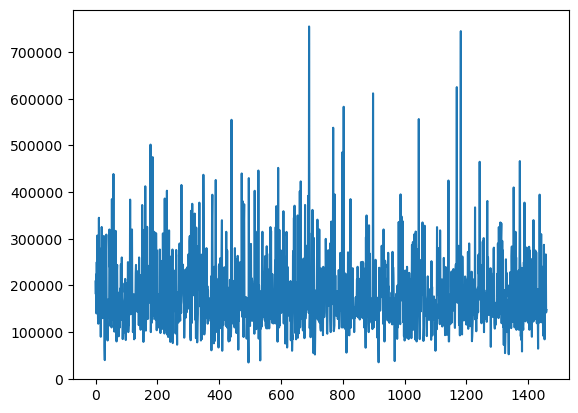

In [14]:
# Plot using Dataframe and plot type = 'line'
df_numerical['SalePrice'].plot(kind = 'line')

In [15]:
df_numerical['SalePrice'].sort_values(ascending=True).unique()

array([ 34900,  35311,  37900,  39300,  40000,  52000,  52500,  55000,
        55993,  58500,  60000,  61000,  62383,  64500,  66500,  67000,
        68400,  68500,  72500,  73000,  75000,  75500,  76000,  76500,
        78000,  79000,  79500,  79900,  80000,  80500,  81000,  82000,
        82500,  83000,  83500,  84000,  84500,  84900,  85000,  85400,
        85500,  86000,  87000,  87500,  88000,  89000,  89471,  89500,
        90000,  90350,  91000,  91300,  91500,  92000,  92900,  93000,
        93500,  94000,  94500,  94750,  95000,  96500,  97000,  97500,
        98000,  98300,  98600,  99500,  99900, 100000, 101000, 101800,
       102000, 102776, 103000, 103200, 103600, 104000, 104900, 105000,
       105500, 105900, 106000, 106250, 106500, 107000, 107400, 107500,
       107900, 108000, 108480, 108500, 108959, 109000, 109008, 109500,
       109900, 110000, 110500, 111000, 111250, 112000, 112500, 113000,
       114500, 114504, 115000, 116000, 116050, 116500, 116900, 117000,
      

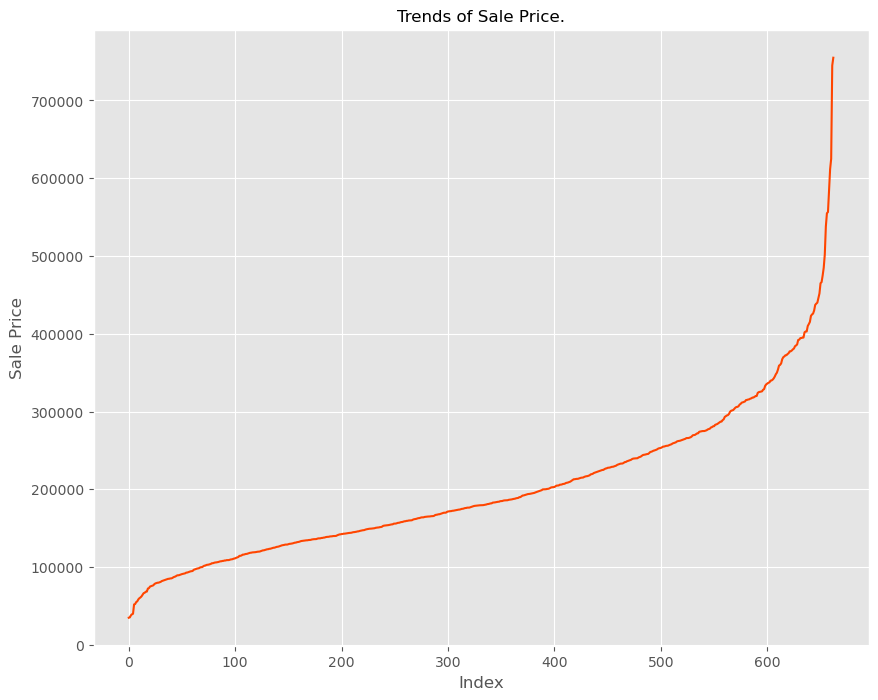

In [16]:
plt.style.use('ggplot')
plt.figure(figsize = (10,8))
plt.plot(df_numerical['SalePrice'].sort_values(ascending=True).unique(), color = 'orangered')
plt.xlabel('Index')
plt.ylabel('Sale Price')
# size = set the font size for Title & Labels
plt.title('Trends of Sale Price.', size = 12)
plt.show()

#### Bar Plot
    * Univariate or Bivariate Plots
    * Bar Chart are used with Categorical Dataset. 
    * Bar Plots are used to display counts of unique value for categorical type , Height of Bar indicate count for each categirical value. 

In [18]:
df_categorical.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition
0,SC60,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,RFn,TA,TA,Y,No,No,No,Feb,WD,Normal
1,SC20,RL,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,RFn,TA,TA,Y,No,No,No,May,WD,Normal
2,SC60,RL,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,RFn,TA,TA,Y,No,No,No,Sep,WD,Normal
3,SC70,RL,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Unf,TA,TA,Y,No,No,No,Feb,WD,Abnorml
4,SC60,RL,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,RFn,TA,TA,Y,No,No,No,Dec,WD,Normal


In [22]:
df_categorical['MoSold'].value_counts()

MoSold
Jun    253
Jul    234
May    204
Apr    141
Aug    122
Mar    106
Oct     89
Nov     79
Sep     63
Dec     59
Jan     58
Feb     52
Name: count, dtype: int64

<Axes: xlabel='MoSold'>

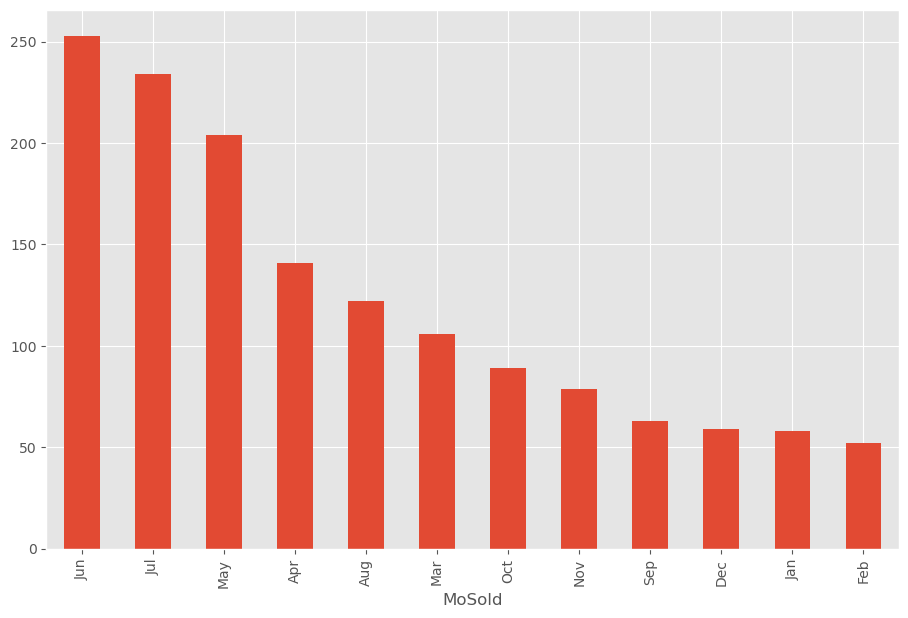

In [40]:
df_categorical['MoSold'].value_counts().plot(kind = 'bar', figsize = (11,7))

In [32]:
df_categorical['MoSold'].value_counts().index

Index(['Jun', 'Jul', 'May', 'Apr', 'Aug', 'Mar', 'Oct', 'Nov', 'Sep', 'Dec',
       'Jan', 'Feb'],
      dtype='object', name='MoSold')

In [34]:
df_categorical['MoSold'].value_counts().values

array([253, 234, 204, 141, 122, 106,  89,  79,  63,  59,  58,  52],
      dtype=int64)

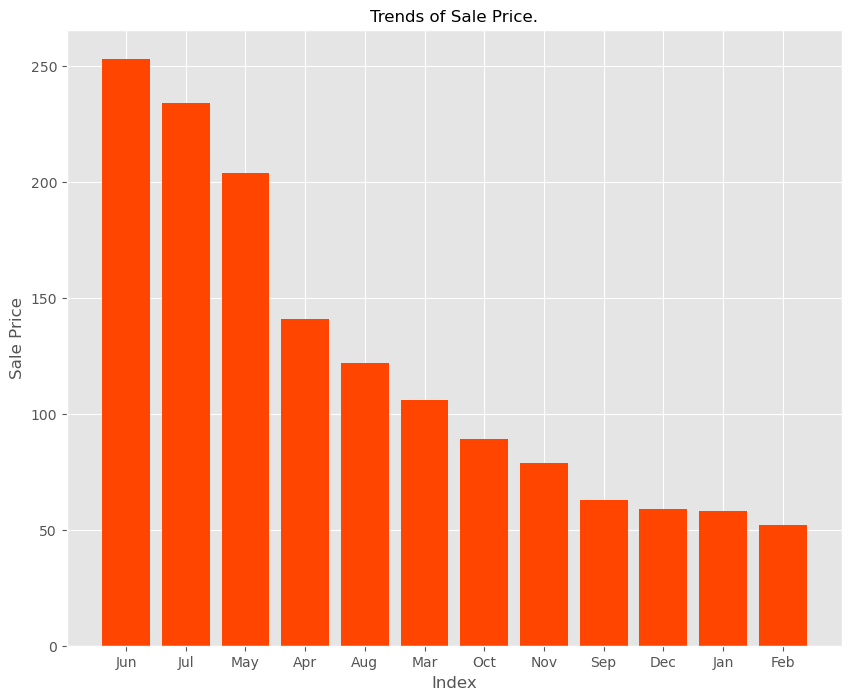

In [30]:
plt.figure(figsize = (10,8))
plt.bar(x = df_categorical['MoSold'].value_counts().index, 
        height = df_categorical['MoSold'].value_counts().values , color = 'orangered')
plt.xlabel('Index')
plt.ylabel('Sale Price')
# size = set the font size for Title & Labels
plt.title('Trends of Sale Price.', size = 12)
plt.show()

#### Histogram
    * Univariate Analysis - Apply on continious Data.
    * Frequency of Data in Range. 
    * Study of Spread / Data Distribution.

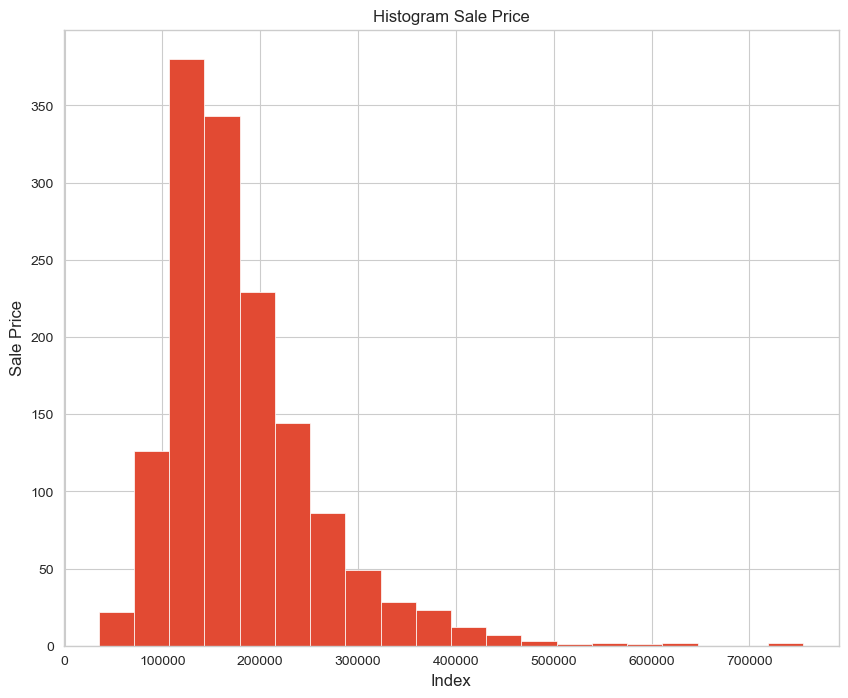

In [64]:
sns.set_style('whitegrid')
plt.figure(figsize = (10,8))
# bins = 20, Indicates 20 equal distribution of Numerical Data.
plt.hist(df_numerical['SalePrice'], bins = 20)
plt.xlabel('Index')
plt.ylabel('Sale Price')
# size = set the font size for Title & Labels
plt.title('Histogram Sale Price', size = 12)
plt.show()

#### Subplots
    * Here one plot will be splitted into multiple plots. Each Index position will be occupied by one Plot.

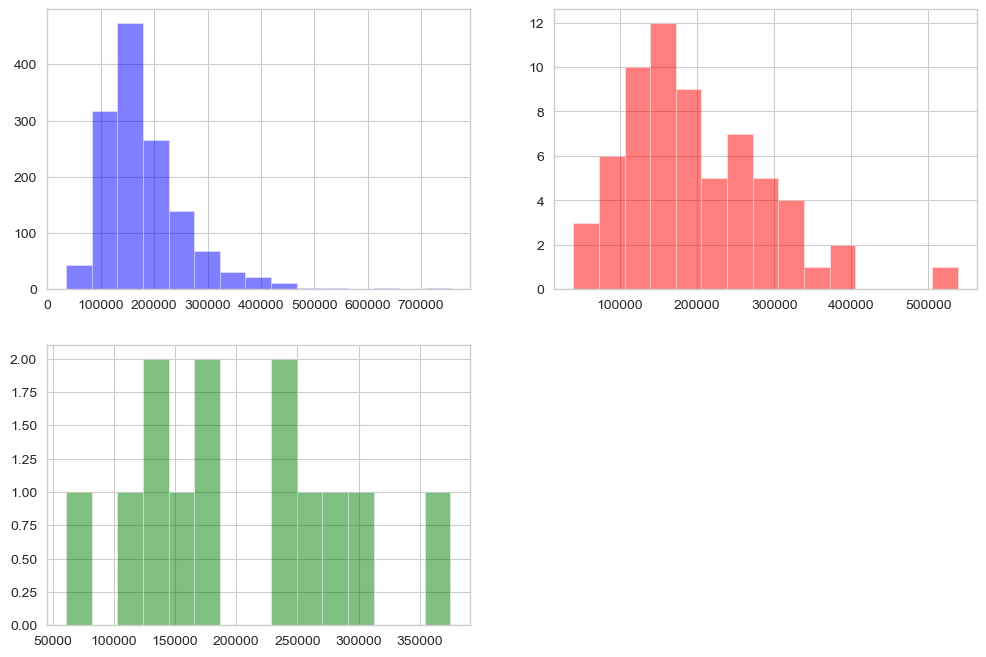

In [109]:
plt.figure(figsize = (12,8))
plt.subplot(2, 2, 1)
plt.hist(housing_data[housing_data['LandSlope']=='Gtl']['SalePrice'], bins = 15, color = 'b', alpha = 0.5)
plt.subplot(2, 2, 2)
plt.hist(housing_data[housing_data['LandSlope']=='Mod']['SalePrice'], bins = 15, color = 'r', alpha = 0.5)
plt.subplot(2, 2, 3) 
plt.hist(housing_data[housing_data['LandSlope']=='Sev']['SalePrice'], bins = 15, color = 'g', alpha = 0.5)
plt.show()

#### Scatter Plot
    * Indicates relationship Plot or Correlation between two numerical columns.

In [112]:
df_numerical

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,548,0,61,0,0,0,0,0,2008,208500
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,460,298,0,0,0,0,0,0,2007,181500
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,608,0,42,0,0,0,0,0,2008,223500
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,642,0,35,272,0,0,0,0,2006,140000
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,836,192,84,0,0,0,0,0,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,5,1999,2000,0.0,0,0,953,...,460,0,40,0,0,0,0,0,2007,175000
1456,85.0,13175,6,6,1978,1988,119.0,790,163,589,...,500,349,0,0,0,0,0,0,2010,210000
1457,66.0,9042,7,9,1941,2006,0.0,275,0,877,...,252,0,60,0,0,0,0,2500,2010,266500
1458,68.0,9717,5,6,1950,1996,0.0,49,1029,0,...,240,366,0,112,0,0,0,0,2010,142125


In [122]:
df_numerical[df_numerical['LotArea'] < 50000]['LotArea']

0        8450
1        9600
2       11250
3        9550
4       14260
        ...  
1455     7917
1456    13175
1457     9042
1458     9717
1459     9937
Name: LotArea, Length: 1449, dtype: int64

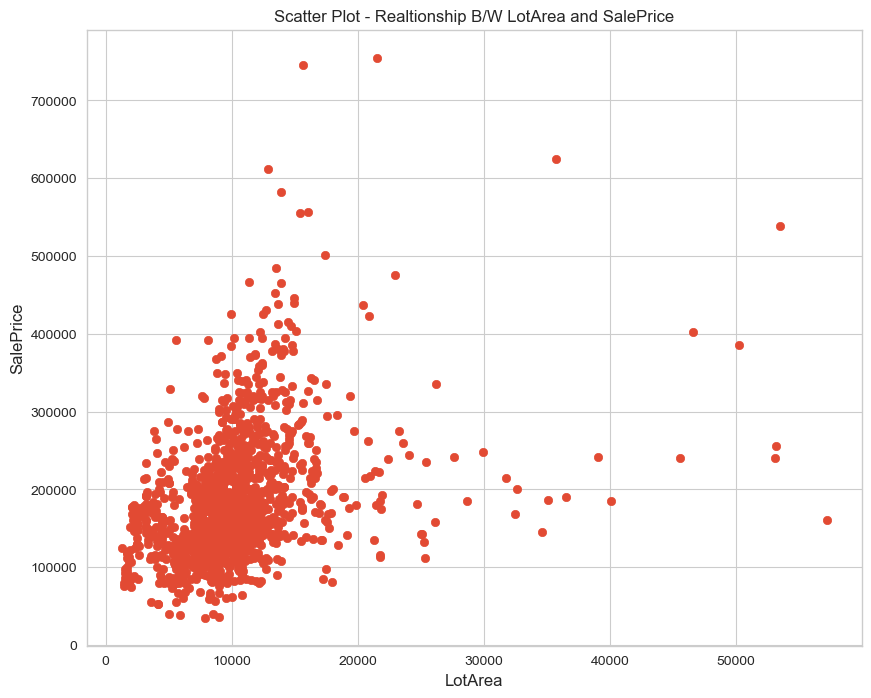

In [140]:
plt.figure(figsize = (10,8))
plt.scatter(x = df_numerical[df_numerical['LotArea'] < 60000]['LotArea'], 
            y = df_numerical[df_numerical['LotArea'] < 60000]['SalePrice'])
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.title('Scatter Plot - Realtionship B/W LotArea and SalePrice', size=12)
plt.show()

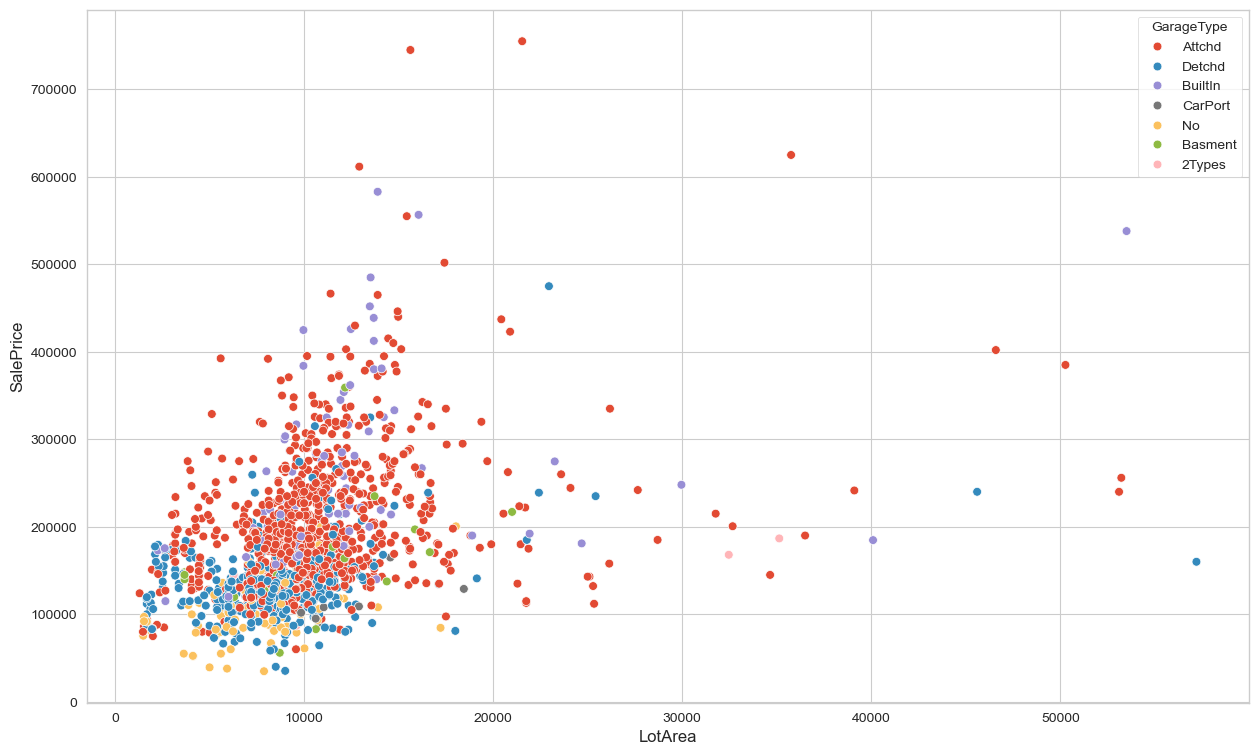

In [164]:
plt.figure(figsize = (15,9))
sns.scatterplot(x = df_numerical[df_numerical['LotArea'] < 60000]['LotArea'], 
                y = df_numerical[df_numerical['LotArea'] < 60000]['SalePrice'], 
                hue = df_categorical['GarageType'], s = 40)
plt.show()

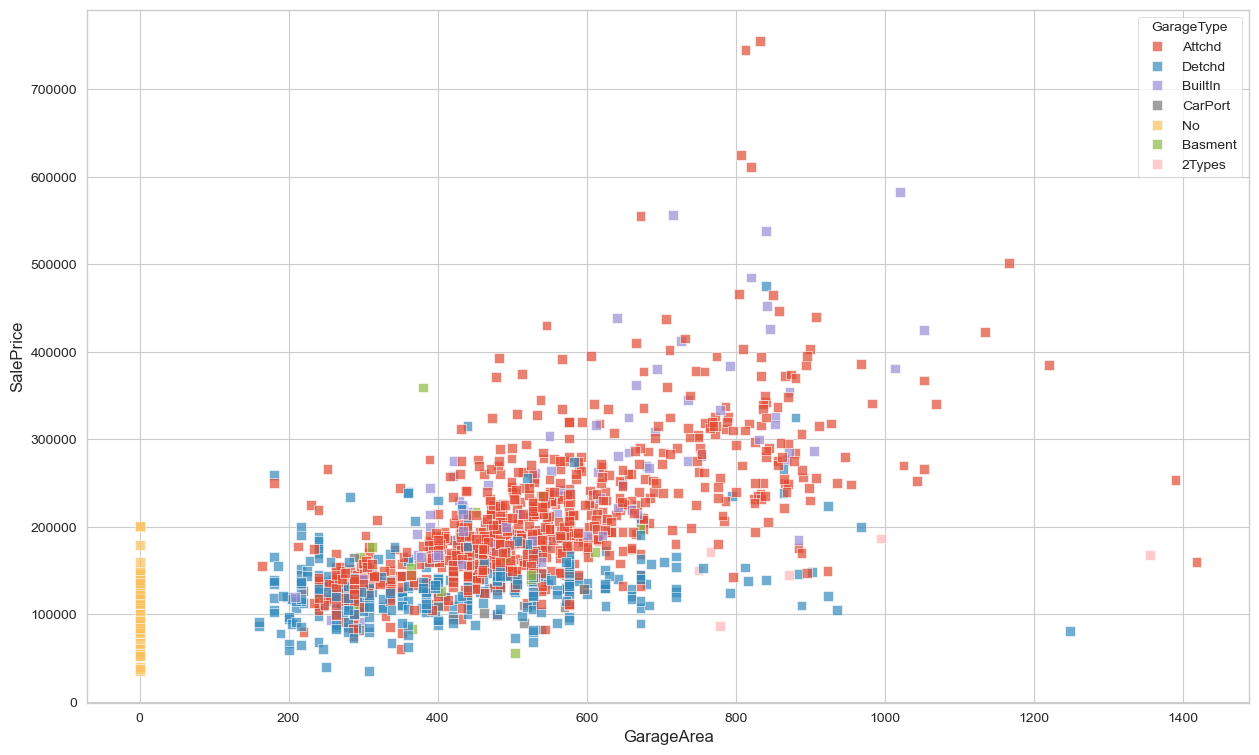

In [178]:
plt.figure(figsize = (15,9))
# s = size of bubble, marker = 's','^','>','<','*','.','+','d','o'
sns.scatterplot(x = df_numerical['GarageArea'], y = df_numerical['SalePrice'], 
                hue = df_categorical['GarageType'], s = 50, marker = 's', alpha = 0.7)
plt.show() 

In [166]:
df_numerical['GarageCars'].unique()

array([2, 3, 1, 0, 4], dtype=int64)

In [168]:
df_numerical

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,548,0,61,0,0,0,0,0,2008,208500
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,460,298,0,0,0,0,0,0,2007,181500
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,608,0,42,0,0,0,0,0,2008,223500
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,642,0,35,272,0,0,0,0,2006,140000
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,836,192,84,0,0,0,0,0,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,5,1999,2000,0.0,0,0,953,...,460,0,40,0,0,0,0,0,2007,175000
1456,85.0,13175,6,6,1978,1988,119.0,790,163,589,...,500,349,0,0,0,0,0,0,2010,210000
1457,66.0,9042,7,9,1941,2006,0.0,275,0,877,...,252,0,60,0,0,0,0,2500,2010,266500
1458,68.0,9717,5,6,1950,1996,0.0,49,1029,0,...,240,366,0,112,0,0,0,0,2010,142125


#### Pie-Chart
    * Frequency distribution plot. 

In [184]:
df_categorical['LotConfig'].value_counts()

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

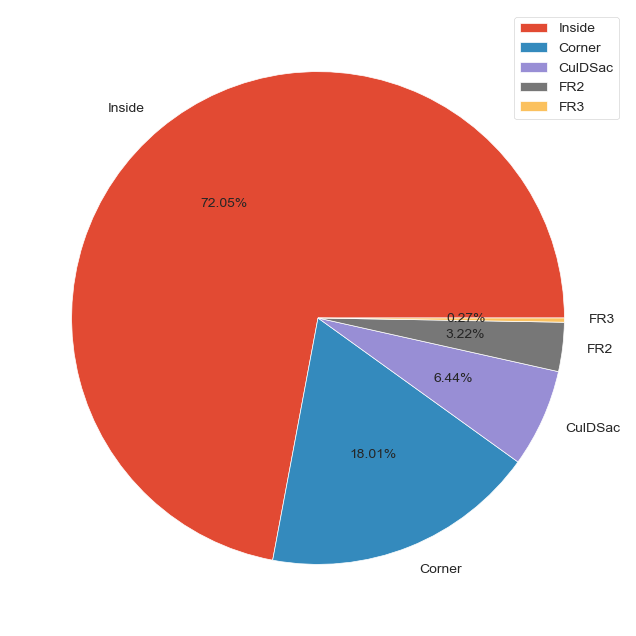

In [208]:
plt.figure(figsize = (8,8))
plt.pie(df_categorical['LotConfig'].value_counts(), autopct = '%0.2f%%',
        labels = ['Inside','Corner','CulDSac','FR2','FR3'])
plt.legend(loc = 1)
plt.show()

#### Kernel Density Estimator (KDE)
    * Shows Histogram + Density Plot to display distribution of Numerical Continious Data.

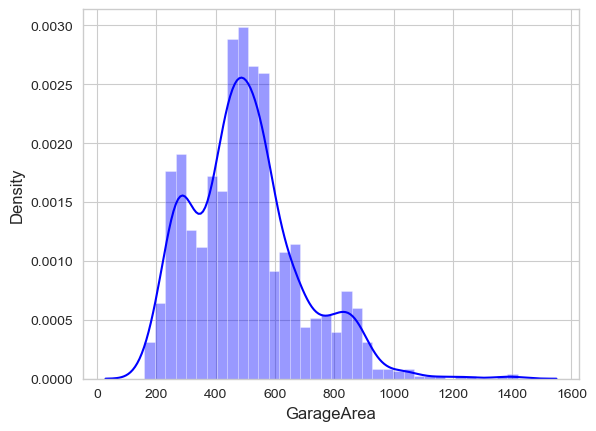

In [232]:
import warnings
warnings.filterwarnings('ignore')

sns.distplot(df_numerical[df_numerical['GarageArea']>0]['GarageArea'], color = 'blue')
plt.show() 

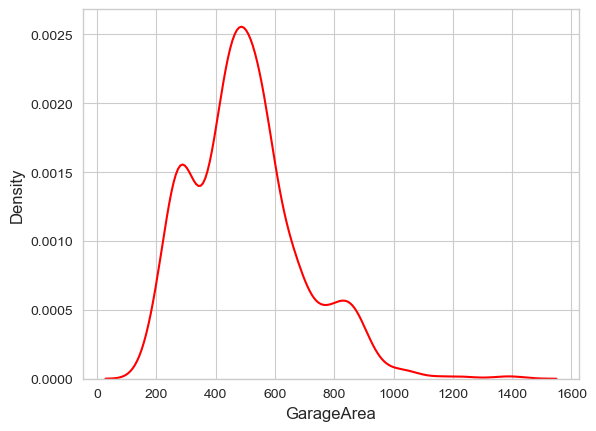

In [236]:
sns.distplot(df_numerical[df_numerical['GarageArea']>0]['GarageArea'], color = 'red', hist = False)
plt.show()

#### Boxplot
Area Plot
